<a href="https://colab.research.google.com/github/ogreen8084/cleaning/blob/master/Clean_candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# So Much Candy, So Much Cleaning!
In this notebook we will clean the 2016 version of the #candyhierarchy dataset that can be found here: https://www.scq.ubc.ca/so-much-candy-data-seriously/


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Imports


In [2]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)

Importing the Dataset

In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/candy_2016.xlsx',index_col='Timestamp')
df.index = pd.to_datetime(df.index)
df2 = df.copy()

We have 122 features and 1259 responders. We'll go through the features and clean up where we can

In [4]:
df.shape

(1259, 122)

We can immediately see that the formatting of the questions/column names is strange, our first step will be cleaning these up as well as reducing the size of some of the longer questions

In [5]:
df.head()

,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers (the candy)],[Bonkers (the board game)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],[Butterfinger],[Cadbury Creme Eggs],[Candy Corn],[Candy that is clearly just the stuff given out for free at restaurants],[Caramellos],"[Cash, or other forms of legal tender]",[Chardonnay],[Chick-o-Sticks (we don’t know what that is)],[Chiclets],[Coffee Crisp],[Creepy Religious comics/Chick Tracts],[Dental paraphenalia],[Dots],[Dove Bars],[Fuzzy Peaches],[Generic Brand Acetaminophen],[Glow sticks],[Goo Goo Clusters],[Good N' Plenty],[Gum from baseball cards],[Gummy Bears straight up],[Hard Candy],[Healthy Fruit],[Heath Bar],[Hershey's Dark Chocolate],[Hershey’s Milk Chocolate],[Hershey's Kisses],[Hugs (actual physical hugs)],[Jolly Rancher (bad flavor)],[Jolly Ranchers (good flavor)],[JoyJoy (Mit Iodine!)],[Junior Mints],[Senior Mints],[Kale smoothie],[Kinder Happy Hippo],[Kit Kat],[LaffyTaffy],[LemonHeads],[Licorice (not black)],[Licorice (yes black)],[Lindt Truffle],[Lollipops],[Mars],[Mary Janes],[Maynards],[Mike and Ike],[Milk Duds],[Milky Way],[Regular M&Ms],[Peanut M&M’s],[Blue M&M's],[Red M&M's],[Third Party M&M's],[Minibags of chips],[Mint Kisses],[Mint Juleps],[Mr. Goodbar],[Necco Wafers],[Nerds],[Nestle Crunch],[Now'n'Laters],[Peeps],[Pencils],[Person of Interest Season 3 DVD Box Set (not including Disc 4 with hilarious outtakes)],[Pixy Stix],[Reese’s Peanut Butter Cups],[Reese's Pieces],[Reggie Jackson Bar],[Rolos],[Skittles],[Smarties (American)],[Smarties (Commonwealth)],[Snickers],[Sourpatch Kids (i.e. abominations of nature)],[Spotted Dick],[Starburst],[Sweet Tarts],[Swedish Fish],[Sweetums (a friend to diabetes)],[Tic Tacs],[Those odd marshmallow circus peanut things],[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Please list any items not included above that give you JOY.,Please list any items not included above that give you DESPAIR.,"Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.",Guess the number of mints in my hand.,Betty or Veronica?,"""That dress* that went viral a few years back - when I first saw it, it was ________""",What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DES

In [6]:
list(df.columns)

['Are you going actually going trick or treating yourself?',
 'Your gender:',
 'How old are you?',
 'Which country do you live in?',
 'Which state, province, county do you live in?',
 ' [100 Grand Bar]',
 ' [Anonymous brown globs that come in black and orange wrappers]',
 ' [Any full-sized candy bar]',
 ' [Black Jacks]',
 ' [Bonkers (the candy)]',
 ' [Bonkers (the board game)]',
 ' [Bottle Caps]',
 " [Box'o'Raisins]",
 ' [Broken glow stick]',
 ' [Butterfinger]',
 ' [Cadbury Creme Eggs]',
 ' [Candy Corn]',
 ' [Candy that is clearly just the stuff given out for free at restaurants]',
 ' [Caramellos]',
 ' [Cash, or other forms of legal tender]',
 ' [Chardonnay]',
 ' [Chick-o-Sticks (we don’t know what that is)]',
 ' [Chiclets]',
 ' [Coffee Crisp]',
 ' [Creepy Religious comics/Chick Tracts]',
 ' [Dental paraphenalia]',
 ' [Dots]',
 ' [Dove Bars]',
 ' [Fuzzy Peaches]',
 ' [Generic Brand Acetaminophen]',
 ' [Glow sticks]',
 ' [Goo Goo Clusters]',
 " [Good N' Plenty]",
 ' [Gum from baseball c

We'll use Regex to clean up the brackets and spacing, for some of the longer column names we'll trim those manually using replace

In [7]:
df.columns = df.columns.str.replace('[','', regex=True)
df.columns = df.columns.str.replace(']','', regex=True)
df.columns = df.columns.str.replace('"','', regex=True)
df.columns = df.columns.str.replace(r"^ +| +$", r"", regex=True)

In [8]:
replace1 = {'Are you going actually going trick or treating yourself?':'Trick or Treater?', 
            'Your gender:':'Gender','How old are you?':'Age', 'Which country do you live in?':'Country', 
 'Which state, province, county do you live in?':'State/Province',
 'Please list any items not included above that give you JOY.':'Any Other Joy Item',
 'Please list any items not included above that give you DESPAIR.':'Any Other Despair Item',
 'Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.':'Comments',
  'Guess the number of mints in my hand.': 'Guess Mints in my Hand', 
 'That dress* that went viral a few years back - when I first saw it, it was ________':'Viral Dress Color',
  'What is your favourite font?':'Favorite Font',
   'Please estimate the degree(s) of separation you have from the following celebrities JK Rowling':'DOS JK Rowling',
 'Please estimate the degree(s) of separation you have from the following celebrities JJ Abrams':'DOS JJ Abrams',
 'Please estimate the degree(s) of separation you have from the following celebrities Beyoncé':'DOS Beyonce',
 'Please estimate the degree(s) of separation you have from the following celebrities Bieber':'DOS Beiber',
 'Please estimate the degree(s) of separation you have from the following celebrities Kevin Bacon':'DOS Kevin Bacon',
 'Please estimate the degree(s) of separation you have from the following celebrities Francis Bacon (1561 - 1626)':'DOS Francis Bacon (1561 - 1626)',
 'Which day do you prefer, Friday or Sunday?':'Friday or Sunday',
 'Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?':'Apples NS or EW',
 'When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).':'Which Site',
 'Anonymous brown globs that come in black and orange wrappers':'black and orange wrapper',
'Candy that is clearly just the stuff given out for free at restaurants':'Free Restaurant Candy',
'Cash, or other forms of legal tender':'Legal Tender',
'Chick-o-Sticks (we don’t know what that is)':'Chick-o-Sticks',
'Generic Brand Acetaminophen':'Generic Tylenol',
'Person of Interest Season 3 DVD Box Set (not including Disc 4 with hilarious outtakes)':'Person of Interest DVD 1-3',
'Sourpatch Kids (i.e. abominations of nature)':'Sourpatch Kids',
'Sweetums (a friend to diabetes)':'Sweetums',
'Those odd marshmallow circus peanut things':'Marshmallow Circus Peanuts',
'Vials of pure high fructose corn syrup, for main-lining into your vein':'HCFS Vials'}

In [9]:
df = df.rename(columns=replace1)

Our new columns

In [10]:
list(df.columns)

['Trick or Treater?',
 'Gender',
 'Age',
 'Country',
 'State/Province',
 '100 Grand Bar',
 'black and orange wrapper',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Free Restaurant Candy',
 'Caramellos',
 'Legal Tender',
 'Chardonnay',
 'Chick-o-Sticks',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Tylenol',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 'Hershey’s Milk Chocolate',
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Rancher (bad flavor)',
 'Jolly Ranchers (good flavor)',
 'JoyJoy (Mit Iodine!)',
 'Junior Mints',
 'Senior Mints',
 'Kale smoothie',
 'Kinder Happ

In [11]:
df.head()

,Trick or Treater?,Gender,Age,Country,State/Province,100 Grand Bar,black and orange wrapper,Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Free Restaurant Candy,Caramellos,Legal Tender,Chardonnay,Chick-o-Sticks,Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Tylenol,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Third Party M&M's,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Person of Interest DVD 1-3,Pixy Stix,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums,Tic Tacs,Marshmallow Circus Peanuts,Three Musketeers,Tolberone something or other,Trail Mix,Twix,HCFS Vials,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Any Other Joy Item,Any Other Despair Item,Comments,Guess Mints in my Hand,Betty or Veronica?,Viral Dress Color,Favorite Font,DOS JK Rowling,DOS JJ Abrams,DOS Beyonce,DOS Beiber,DOS Kevin Bacon,DOS Francis Bacon (1561 - 1626),Friday or Sunday,Apples NS or EW,Which Site,York Peppermint Patties Ignore
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,200000,Betty,White and gold,impact,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,17,Betty,White and gold,Calibri,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,MEH,MEH,MEH,MEH,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,JOY,MEH,MEH,MEH,MEH,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,JOY,MEH,JOY,DESPAIR,MEH,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,MEH,MEH,JOY,ME

Our next step will be to identify where there are null values in our data, we'll utilize the missingno library to identify the nulls visually then print the columns that have null values

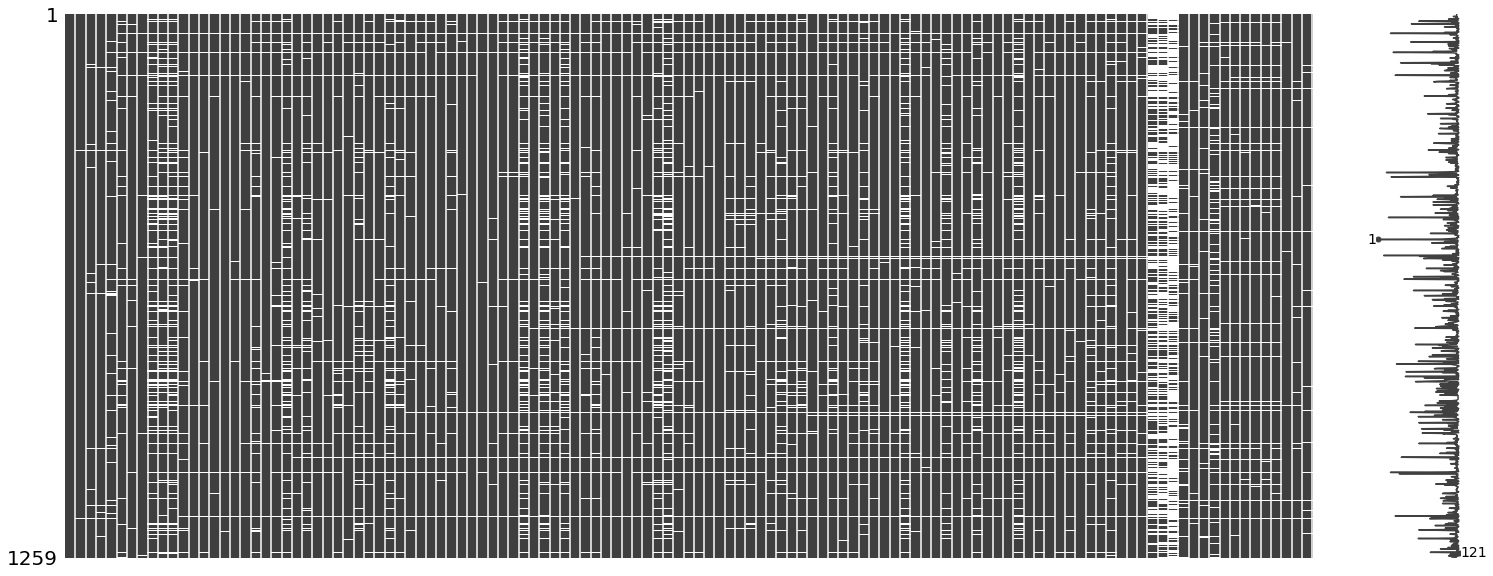

In [12]:
msno.matrix(df)
plt.show()

In [13]:
null_cols = list(df.columns[df.isnull().any()])
null_cols

['Gender',
 'Age',
 'Country',
 'State/Province',
 '100 Grand Bar',
 'black and orange wrapper',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Free Restaurant Candy',
 'Caramellos',
 'Legal Tender',
 'Chardonnay',
 'Chick-o-Sticks',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Tylenol',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 'Hershey’s Milk Chocolate',
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Rancher (bad flavor)',
 'Jolly Ranchers (good flavor)',
 'JoyJoy (Mit Iodine!)',
 'Junior Mints',
 'Senior Mints',
 'Kale smoothie',
 'Kinder Happy Hippo',
 'Kit Kat',


We will use "Did not Answer" in place of null values, the only place that this may cause a problem is the age column which is currently an object type but it will be converted to an ordinal bin of numbers. We'll exclude Age from our list for now

In [14]:
cols_to_did_not = list(df.columns)
cols_to_did_not.remove('Age')

In [15]:
df[cols_to_did_not] = df[cols_to_did_not].fillna('Did not Answer')

At this point, we also need to check for cases when there may be too much cardinality.  There are only 1200+ datapoints in our dataset, there may be cases when splitting up the data too much doesn't make sense. We'll look at whenever there are 10+ unique responses to a question

In [16]:
df.nunique()[df.nunique() > 10]

Age                        98
Country                   102
State/Province            320
Any Other Joy Item        606
Any Other Despair Item    512
Comments                  339
Guess Mints in my Hand    193
Favorite Font             537
Apples NS or EW           287
dtype: int64

# Candy Answer Hierarchy
We'll start cleaning columns by creating a numerical hierarchy for candy ratings. If a respondent didn't answer we will impute a 1, despair will have a value of 0, meh will have a value of 2 and joy will have a value of 3. I am considering didn't answer as no opinion so it is above despair but below meh. We'll create a function that can handle all of these questions and find all columns where there is a ranking of this sort so we don't need to fix things manually. This will save us time as the questions make up 100 of our 122 columns

In [17]:
def find_col_with_value(df, value):
    keep_cols = []
    for col in df:
        if (df[col] == value).any():
             keep_cols.append(col)
    return keep_cols

In [18]:
feeling_cols = find_col_with_value(df, 'MEH')
len(feeling_cols)

100

In [19]:
feeling_ratings = {'DESPAIR':0, 'Did not Answer':1, 'MEH':2,'JOY':3}
for col in feeling_cols:
    df[col] = df[col].map(feeling_ratings)

# Demographic/Other Questions

In [20]:
other_cols = [col for col in df.columns if col not in feeling_cols]

In [21]:
len(other_cols)

22

In [22]:
for col in other_cols:
    print(df[col].value_counts()[:5])

No     1121
Yes     138
Name: Trick or Treater?, dtype: int64
Male                  795
Female                410
I'd rather not say     28
Other                  17
Did not Answer          9
Name: Gender, dtype: int64
35    50
33    49
38    48
45    48
42    45
Name: Age, dtype: int64
USA              433
United States    182
usa              128
Canada            99
US                87
Name: Country, dtype: int64
Did not Answer    79
California        69
CA                41
Ontario           39
PA                31
Name: State/Province, dtype: int64
Did not Answer        578
Almond Joy             12
Dairy milk buttons      9
Puppies                 7
Take 5                  6
Name: Any Other Joy Item, dtype: int64
Did not Answer    701
Red Hots           10
Popcorn balls       6
Popcorn Balls       5
Tootsie Rolls       4
Name: Any Other Despair Item, dtype: int64
Did not Answer                                                                              917
No                   

We'll convert whether the respondent is a trick or treater from Yes/No to a binary 1/0

In [23]:
print('Trick or Treater?' in null_cols)
yes_no = {"Yes":1, "No":0,  }
df['Trick or Treater?'] = df['Trick or Treater?'].map(yes_no)

False


For Gender we'll group "I'd rather not say" with "Did not Answer"

In [24]:
df['Gender'] = df['Gender'].replace("I'd rather not say","Did not Answer")

In [25]:
df['Gender'].value_counts()

Male              795
Female            410
Did not Answer     37
Other              17
Name: Gender, dtype: int64

In [26]:
pd.set_option('display.max_rows', None)

For "Age" we will impute the average for anyone who answered with a non-numerical answer. We will also add a column called "No Age" to indicate when there was a non-numerical answer given. First we will fill the nulls with zero, which was not utilized as an answer (verified below). Finally we'll bin ages in ordinal fashion

In [27]:
df[df['Age'] == 0]

,Trick or Treater?,Gender,Age,Country,State/Province,100 Grand Bar,black and orange wrapper,Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Free Restaurant Candy,Caramellos,Legal Tender,Chardonnay,Chick-o-Sticks,Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Tylenol,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Third Party M&M's,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Person of Interest DVD 1-3,Pixy Stix,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums,Tic Tacs,Marshmallow Circus Peanuts,Three Musketeers,Tolberone something or other,Trail Mix,Twix,HCFS Vials,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Any Other Joy Item,Any Other Despair Item,Comments,Guess Mints in my Hand,Betty or Veronica?,Viral Dress Color,Favorite Font,DOS JK Rowling,DOS JJ Abrams,DOS Beyonce,DOS Beiber,DOS Kevin Bacon,DOS Francis Bacon (1561 - 1626),Friday or Sunday,Apples NS or EW,Which Site,York Peppermint Patties Ignore
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [28]:
df['Age'] =pd.to_numeric(df['Age'], errors ='coerce').fillna(0).astype('int')
avg_age = int(df['Age'][df['Age'] !=0].mean())
df['Age'] = df['Age'].map(lambda x: x if x < 120 else 0)
df['No Age'] = df['Age'].map(lambda x: 1 if x == 0 else 0) 
df['Age'] = df['Age'].map(lambda x: x if x != 0 else avg_age)

In [29]:
def fix_age(val):
    if val <= 18:
        return 1
    if val <= 25:
        return 2
    if val <= 34:
        return 3
    if val <= 45:
        return 4
    if val <= 55:
        return 5
    if val <= 65:
        return 6
    if val > 65:
        return 7

df['Age'] = df['Age'].map(fix_age)

In [30]:
df['Age'].value_counts()

4    430
3    304
5    270
6     96
7     88
2     45
1     26
Name: Age, dtype: int64

Most respondents are either from the US or Canada, but the free format makes it hard to just group these things together as a computer would not know US = U.S. To help we will take out all spaces and special characters and look for canada, us, or united states

In [31]:
def fix_country(country):
    try:
        country = re.sub(r'\W+', '', country).lower()
        if 'us' in country:
            return 'United States'
        elif 'united' in country and 'state' in country:
            return 'United States'
        elif 'canada' in country:
            return 'Canada'
        else:
            return 'Other'
    except:
        return 'Other'

df['Country'] = df['Country'].map(fix_country)

In [32]:
df['Country'].value_counts()

United States    1026
Canada            118
Other             115
Name: Country, dtype: int64

For State/Province we are going to need some help. Respondents could have used the state/province name or an abbreviation to identify their state/province. We'll use a file tht contains states and provinces with abbreviations and map a function to try to find the respondents' home. "Did not Answer" will be grouped with "Other"

In [33]:
states = pd.read_excel('/content/gdrive/MyDrive/states.xlsx')

In [34]:
states.head()

,state,abbreviation
0,alabama,AL
1,alaska,AK
2,arizona,AZ
3,arkansas,AR
4,california,CA


As you can see, CA and California both indicate the same thing

In [35]:
df['State/Province'].value_counts()[:10]

Did not Answer    79
California        69
CA                41
Ontario           39
PA                31
NY                24
Oregon            24
New York          23
MA                23
WA                23
Name: State/Province, dtype: int64

In [36]:
def state_convert(value):
    state_dict1 = dict(zip(states.state,states.abbreviation))
    state_dict2 = dict(zip(states.abbreviation, states.abbreviation))

    try: 
        if value.lower().strip() in state_dict1.keys():
            return state_dict1[value.lower().strip()]
        elif value is np.nan:
            return "Did Not Answer"
        else:
            vals = value.replace(',','').split(' ')
            for val in vals:
                if val.lower() in state_dict1.keys():
                    return state_dict1[val.lower()]
                elif val.upper() in state_dict2.keys():
                    return state_dict2[val.upper()]
                else:
                    pass
            vals2 = value.split(',')
            for val in vals2:
                if val.lower() in state_dict1.keys():
                    return state_dict1[val.lower()]
                elif val.upper() in state_dict2.keys():
                    return state_dict2[val.upper()]
                else:
                    pass
            return 'Other'
    except:
        return 'Other'

In [37]:
df['State/Province_FIXED'] = df['State/Province'].map(state_convert)

In [38]:
df['State/Province'] = df['State/Province_FIXED']
df.drop(columns=['State/Province_FIXED'], inplace=True)

In [39]:
df['State/Province'].value_counts()[:10]

CA       157
Other    152
NY        76
WA        69
PA        61
ON        49
MA        47
TX        42
OR        42
IL        42
Name: State/Province, dtype: int64

For Degrees of Separation questions, we will create a number hierarchy. "Did not Answer" will be assigned to the mode for each question

In [40]:
dos_columns = []
for col in df.columns:
    if 'DOS' in col:
        dos_columns.append(col)
dos_columns

['DOS JK Rowling',
 'DOS JJ Abrams',
 'DOS Beyonce',
 'DOS Beiber',
 'DOS Kevin Bacon',
 'DOS Francis Bacon (1561 - 1626)']

In [41]:
df['DOS JK Rowling'].value_counts(dropna=False)

3 or higher             958
2                       133
Did not Answer           82
1                        56
Actually, that's me.     30
Name: DOS JK Rowling, dtype: int64

In [42]:
dos_col_mapper = {'3 or higher': int(3), '2':int(2), '1':int(1),  "Actually, that's me.":int(0)}
for col in dos_columns:
    mode = str(df[col].mode().values[0])
    df[col] = df[col].astype(str)
    df[col]= df[col].str.replace('Did not Answer', mode)
    df[col] = df[col].map(dos_col_mapper)
    print(df[col].value_counts(dropna=False))

3    1040
2     133
1      56
0      30
Name: DOS JK Rowling, dtype: int64
3    994
2    173
1     67
0     25
Name: DOS JJ Abrams, dtype: int64
3    1072
2      83
1      66
0      38
Name: DOS Beyonce, dtype: int64
3    1059
2     105
1      66
0      29
Name: DOS Beiber, dtype: int64
3    870
2    228
1    126
0     35
Name: DOS Kevin Bacon, dtype: int64
3    944
0    149
2     86
1     80
Name: DOS Francis Bacon (1561 - 1626), dtype: int64


These columns have too high of a cardinality (or no cardinality) to add value so they will be deleted [Any Other Despair Item','Any Other Joy Item','Comments', 'Favorite Font', 'York Peppermint Patties Ignore']

In [43]:
df.drop(columns=['Any Other Despair Item','Any Other Joy Item','Comments', 'Favorite Font', 'York Peppermint Patties Ignore'], inplace=True)

The "Guess Mints in my Hand" answers will be binned, absolutely ridiculous answers will be grouped together into one category

In [44]:
def mint_binner(val):
    if val == 'Did not Answer':
        return 'Did not Answer'
    else:
        try: 
            if int(val) < 0:
                return 'Ridiculous'
            elif int(val) <= 5:
                return '1 to 5'
            elif int(val) <= 10:
                return '6 to 10'
            elif int(val) <= 20:
                return '11 to 20'
            elif int(val) <= 50:
                return '21 to 50'
            else:
                return 'Ridiculous'
        except:
            return 'Ridiculous'
df['Guess Mints in my Hand'] = df['Guess Mints in my Hand'].map(mint_binner)

In [45]:
df['Guess Mints in my Hand'].value_counts(dropna=False)

1 to 5            495
6 to 10           253
11 to 20          172
Ridiculous        164
21 to 50          107
Did not Answer     68
Name: Guess Mints in my Hand, dtype: int64

"Betty or Veronica", "Did not Answer" will be grouped with those who left question marks for the answer

In [46]:
b_v_mapper = {'Betty':'Betty', 'Veronica':'Veronica','???':'Dont Know', 'Did not Answer': 'Dont Know'}
df['Betty or Veronica?'] = df['Betty or Veronica?'].map(b_v_mapper)

In [47]:
df['Betty or Veronica?'].value_counts()

Betty        522
Veronica     510
Dont Know    227
Name: Betty or Veronica?, dtype: int64

Apple North South or East West questions will be grouped based on whether the apple is "Sliced", "North/South" or "East/West". South/north will be considered the same as north/south and west/east as east/west. All other answers will be considered "Other". We'll use the string functions to look for matching text

In [48]:
def apples(val):
    try:
        if 'knife' in val.lower() or 'slice' in val.lower() or 'cut' in val.lower():
            return 'Sliced'
        elif 'south' in val.lower() and 'north' in val.lower():
            return 'North/South'
        elif 'east' in val.lower() and 'west' in val.lower():
            return 'East/West'
        else:
            return 'Other'
    except:
        return 'Other'

In [49]:
df['Apples NS or EW'] = df['Apples NS or EW'].map(apples)

In [50]:
df['Apples NS or EW'].value_counts()

East/West      802
Other          214
Sliced         136
North/South    107
Name: Apples NS or EW, dtype: int64

"Which Site" and "Friday or Sunday" do not need cleaning, adding "Did not Answer" was sufficient 

In [51]:
df['Friday or Sunday'].value_counts()

Friday            798
Sunday            437
Did not Answer     24
Name: Friday or Sunday, dtype: int64

In [52]:
df['Which Site'].value_counts()

Science: Latest News and Headlines    1006
ESPN                                    95
Daily Dish                              79
YAHOO! Finance.                         42
Did not Answer                          37
Name: Which Site, dtype: int64

# Original Dataset

In [53]:
df2.head()

,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers (the candy)],[Bonkers (the board game)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],[Butterfinger],[Cadbury Creme Eggs],[Candy Corn],[Candy that is clearly just the stuff given out for free at restaurants],[Caramellos],"[Cash, or other forms of legal tender]",[Chardonnay],[Chick-o-Sticks (we don’t know what that is)],[Chiclets],[Coffee Crisp],[Creepy Religious comics/Chick Tracts],[Dental paraphenalia],[Dots],[Dove Bars],[Fuzzy Peaches],[Generic Brand Acetaminophen],[Glow sticks],[Goo Goo Clusters],[Good N' Plenty],[Gum from baseball cards],[Gummy Bears straight up],[Hard Candy],[Healthy Fruit],[Heath Bar],[Hershey's Dark Chocolate],[Hershey’s Milk Chocolate],[Hershey's Kisses],[Hugs (actual physical hugs)],[Jolly Rancher (bad flavor)],[Jolly Ranchers (good flavor)],[JoyJoy (Mit Iodine!)],[Junior Mints],[Senior Mints],[Kale smoothie],[Kinder Happy Hippo],[Kit Kat],[LaffyTaffy],[LemonHeads],[Licorice (not black)],[Licorice (yes black)],[Lindt Truffle],[Lollipops],[Mars],[Mary Janes],[Maynards],[Mike and Ike],[Milk Duds],[Milky Way],[Regular M&Ms],[Peanut M&M’s],[Blue M&M's],[Red M&M's],[Third Party M&M's],[Minibags of chips],[Mint Kisses],[Mint Juleps],[Mr. Goodbar],[Necco Wafers],[Nerds],[Nestle Crunch],[Now'n'Laters],[Peeps],[Pencils],[Person of Interest Season 3 DVD Box Set (not including Disc 4 with hilarious outtakes)],[Pixy Stix],[Reese’s Peanut Butter Cups],[Reese's Pieces],[Reggie Jackson Bar],[Rolos],[Skittles],[Smarties (American)],[Smarties (Commonwealth)],[Snickers],[Sourpatch Kids (i.e. abominations of nature)],[Spotted Dick],[Starburst],[Sweet Tarts],[Swedish Fish],[Sweetums (a friend to diabetes)],[Tic Tacs],[Those odd marshmallow circus peanut things],[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Please list any items not included above that give you JOY.,Please list any items not included above that give you DESPAIR.,"Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.",Guess the number of mints in my hand.,Betty or Veronica?,"""That dress* that went viral a few years back - when I first saw it, it was ________""",What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DES

# Cleaned Dataset

In [54]:
df.head()

,Trick or Treater?,Gender,Age,Country,State/Province,100 Grand Bar,black and orange wrapper,Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Free Restaurant Candy,Caramellos,Legal Tender,Chardonnay,Chick-o-Sticks,Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Tylenol,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Mary Janes,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Third Party M&M's,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Person of Interest DVD 1-3,Pixy Stix,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids,Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums,Tic Tacs,Marshmallow Circus Peanuts,Three Musketeers,Tolberone something or other,Trail Mix,Twix,HCFS Vials,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Guess Mints in my Hand,Betty or Veronica?,Viral Dress Color,DOS JK Rowling,DOS JJ Abrams,DOS Beyonce,DOS Beiber,DOS Kevin Bacon,DOS Francis Bacon (1561 - 1626),Friday or Sunday,Apples NS or EW,Which Site,No Age
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-24 05:09:23.033,0,Male,2,Canada,ON,3,0,3,2,2,2,2,0,0,3,3,0,0,3,3,2,2,2,3,3,0,0,0,3,0,0,0,3,0,3,3,0,0,3,3,3,2,2,3,0,3,3,0,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,0,3,0,0,0,0,2,3,3,3,3,3,3,0,3,3,3,0,3,3,3,0,0,0,3,3,0,3,0,3,0,0,0,3,Ridiculous,Betty,White and gold,3,2,3,3,3,3,Friday,North/South,Science: Latest News and Headlines,0
2016-10-24 05:09:54.798,0,Male,4,United States,IL,2,2,3,3,0,2,3,0,0,3,0,0,0,3,3,3,3,0,2,0,0,3,2,0,2,2,3,0,0,0,0,0,3,3,2,2,2,0,0,2,3,0,0,3,3,2,0,0,3,2,0,3,3,2,2,3,3,0,3,2,2,0,0,2,3,3,2,0,2,0,0,3,0,2,3,3,2,3,3,0,0,3,0,2,3,0,3,0,0,0,3,3,2,3,0,3,3,0,0,3,11 to 20,Betty,White and gold,3,3,3,3,3,3,Friday,East/West,Science: Latest News and Headlines,0
2016-10-24 05:13:06.734,0,Female,5,United States,CO,3,0,3,2,2,3,3,0,0,3,2,2,0,3,2,3,2,0,3,0,0,0,2,2,0,3,2,2,2,2,2,2,3,3,3,3,0,0,0,2,2,2,0,2,2,2,2,2,2,3,2,3,2,2,2,2,3,3,3,3,3,0,2,2,3,2,0,2,2,2,2,2,3,2,3,0,2,3,3,3,3,3,2,0,2,2,3,2,0,3,3,3,0,3,0,0,2,0,0,3,11 to 20,Veronica,White and gold,3,3,3,3,3,3,Sunday,East/West,Science: Latest News and Headlines,0
2016-10-24 05:14:17.192,0,Male,6,United States,IL,3,2,3,2,2,0,0,2,0,3,3,3,2,3,0,0,3,0,3,0,0,2,3,3,0,0,3,2,0,2,2,2,3,3,3,3,0,2,2,0,3,0,0,2,3,3,3,3,3,3,2,3,3,2,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,0,0,2,3,3,2,3,3,3,3,3,2,0,3,3,3,2,0,2,3,3,3,3,0,3,3,0,0,3,1 to 5,Betty,White and gold,3,3,3,3,3,3,Sunday,North/South,Science: Latest News and Headlines,0
2016-10-24 05:14:24.625,1,Male,4,United States,SD,2,0,3,0,2,3,2,0,0,3,3,0,0,2,3,2,2,0,2,3,0,0,3,2,2,2,0,0,0,0,2,2,3,3,3,3,3,0,2,0,0,0,0,2,3,2,2,2,0,3,3,2,0,0,2,2,3,3,2,3,3,0,0,0,0,2,0,3,2,2,2,2,0,2,2,3,2,3,3,3,0,2,2,0,2,2,0,0,2,0,3,3,2,3,3,3,2,0,0,2,21 to 50,Veronica,White and gold,3,3,3,3,3,3,Friday,East/West,ESPN,0


In [55]:
for col in df.columns:
    print(df[col].value_counts())
    print('---------------------------------')

0    1121
1     138
Name: Trick or Treater?, dtype: int64
---------------------------------
Male              795
Female            410
Did not Answer     37
Other              17
Name: Gender, dtype: int64
---------------------------------
4    430
3    304
5    270
6     96
7     88
2     45
1     26
Name: Age, dtype: int64
---------------------------------
United States    1026
Canada            118
Other             115
Name: Country, dtype: int64
---------------------------------
CA       157
Other    152
NY        76
WA        69
PA        61
ON        49
MA        47
TX        42
OR        42
IL        42
VA        38
OH        34
BC        30
MN        29
CO        26
MI        26
NC        25
NJ        25
FL        21
TN        20
MD        19
GA        19
MO        17
AB        15
WI        13
IN        12
AZ        12
KS         9
DC         9
IA         9
AL         9
CT         9
ME         7
KY         7
OK         7
LA         7
SC         6
NH         6
NM         6
VT 